In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


In [2]:
df = pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv')

In [3]:
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
# extract numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['year', 'selling_price', 'km_driven', 'seats'], dtype='object')

In [6]:
#extract categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage',
       'engine', 'max_power', 'torque'],
      dtype='object')

In [7]:
#null values in numerical columns
df[numerical_columns].isnull().sum()


year               0
selling_price      0
km_driven          0
seats            221
dtype: int64

In [8]:
#null values in categorical columns
df[categorical_columns].isnull().sum()

name              0
fuel              0
seller_type       0
transmission      0
owner             0
mileage         221
engine          221
max_power       215
torque          222
dtype: int64

In [9]:
# Visual relations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

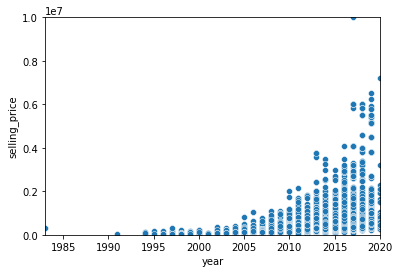

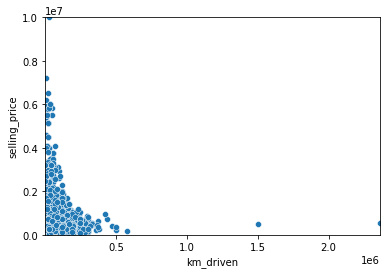

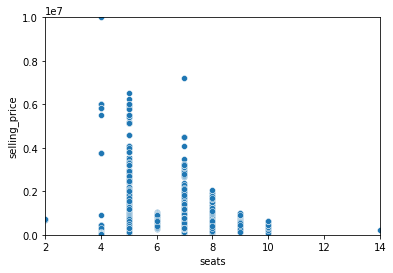

In [10]:
#check relation with selling price (numerical features)
for feature in numerical_columns:
    if feature != 'selling_price':
        ax = sns.scatterplot(data=df,x=feature,y='selling_price')
        plt.xlim(df[feature].min(), df[feature].max())
        plt.ylim(0, df['selling_price'].max())
        plt.xlabel(feature)
        plt.ylabel('selling_price')
        plt.show()
    

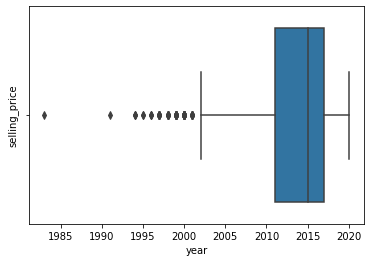

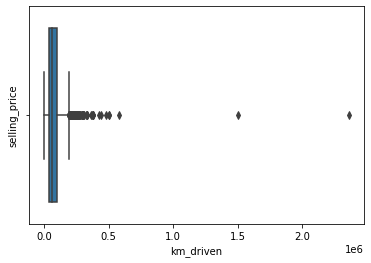

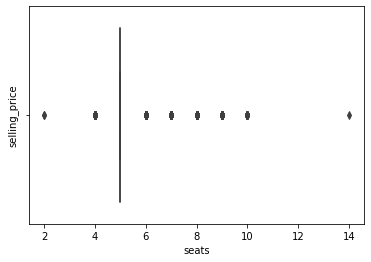

In [11]:
#check outliers
for feature in numerical_columns:
    if feature != 'selling_price':
        ax = sns.boxplot(data=df,x=feature)
        plt.xlabel(feature)
        plt.ylabel('selling_price')
        plt.show()
    

In [12]:
def count_outliers(column):
    q1, q3 = column.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return len(column[(column < lower_bound) | (column > upper_bound)])

In [13]:
outlier_counts = df[numerical_columns].apply(count_outliers)

In [14]:
#numerical columns outliers
outlier_counts 

year               81
selling_price     600
km_driven         170
seats            1653
dtype: int64

In [15]:
#all seating options
df.seats.value_counts()

5.0     6254
7.0     1120
8.0      236
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: seats, dtype: int64

In [16]:
#some features are numerical but are represented in categorical, lets fix them
df[categorical_columns].head()

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
0,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
1,Skoda Rapid 1.5 TDI Ambition,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm
2,Honda City 2017-2020 EXi,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)"
3,Hyundai i20 Sportz Diesel,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm
4,Maruti Swift VXI BSIII,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)"


In [17]:
cols_to_fix = ['mileage','engine','max_power','torque']

In [18]:
#consider only numeric value
for value in cols_to_fix:
    df[value] = df[value].str.extract(r'(\d+)')

In [19]:
df[cols_to_fix].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   mileage    7907 non-null   object
 1   engine     7907 non-null   object
 2   max_power  7912 non-null   object
 3   torque     7906 non-null   object
dtypes: object(4)
memory usage: 254.1+ KB


In [20]:
df[categorical_columns].isnull().sum()

name              0
fuel              0
seller_type       0
transmission      0
owner             0
mileage         221
engine          221
max_power       216
torque          222
dtype: int64

In [21]:
#drop rows with null categorical values
df=df.dropna(subset=cols_to_fix)

In [22]:
df.shape

(7906, 13)

In [23]:
df[categorical_columns].isnull().sum()

name            0
fuel            0
seller_type     0
transmission    0
owner           0
mileage         0
engine          0
max_power       0
torque          0
dtype: int64

In [24]:
#now change the dtype of cols_to_fix to numerical
for v in cols_to_fix:
    df[v] = pd.to_numeric(df[v])

In [25]:
#updated numerical values
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power',
       'torque', 'seats'],
      dtype='object')

In [26]:

#update categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [27]:
df[categorical_columns].head() #Its now ready to be encoded for name: LabelEncoder others:pd.get_dummies

,name,fuel,seller_type,transmission,owner
0,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
1,Skoda Rapid 1.5 TDI Ambition,Diesel,Individual,Manual,Second Owner
2,Honda City 2017-2020 EXi,Petrol,Individual,Manual,Third Owner
3,Hyundai i20 Sportz Diesel,Diesel,Individual,Manual,First Owner
4,Maruti Swift VXI BSIII,Petrol,Individual,Manual,First Owner


In [28]:
#lets prepare numerical columns
df[numerical_columns].head()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats
0,2014,450000,145500,23,1248,74,190,5.0
1,2014,370000,120000,21,1498,103,250,5.0
2,2006,158000,140000,17,1497,78,12,5.0
3,2010,225000,127000,23,1396,90,22,5.0
4,2007,130000,120000,16,1298,88,11,5.0


In [29]:
#lets fix torque
def convert_torque(torque_kgm):
    return torque_kgm * 9.80665


for i in range(len(df['torque'])):
    if df['torque'].iloc[i] < 40 or df['name'].iloc[i] in [ 'Mercedes-Benz E-Class E270 CDI',
 'Mercedes-Benz New C-Class 250 CDI Classic',
 'Mercedes-Benz New C-Class C 220 CDI Elegance MT','BMW X5 3.0d','BMW X5','BMW 5 Series 530d','Mercedes-Benz New','Mercedes-Benz E-Class','BMW 5',' Mercedes-Benz New'] :
        df['torque'].iloc[i] = convert_torque(df['torque'].iloc[i])
        
        

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [30]:
df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,18.981027,1458.708829,91.271060,176.990887,5.416393
std,3.863695,8.135827e+05,5.679230e+04,4.064364,503.893057,35.732781,90.831285,0.959208
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.000000,39.226600,2.000000
25%,2012.000000,2.700000e+05,3.500000e+04,16.000000,1197.000000,68.000000,111.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.000000,1248.000000,82.000000,170.000000,5.000000
75%,2017.000000,6.900000e+05,9.542500e+04,22.000000,1582.000000,102.000000,205.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,789.000000,14.000000


In [31]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [32]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder()
name_encoder=le.fit_transform(df['name'])

In [33]:
df['name'] = le.transform(df['name'])

In [34]:
df.shape

(7906, 13)

In [35]:
categorical_columns

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [36]:
df = pd.get_dummies(df)


In [37]:
df.shape

(7906, 23)

In [38]:
df.head()

,name,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,fuel_CNG,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,1249,2014,450000,145500,23,1248,74,190.00000,5.0,0,...,0,1,0,0,1,1,0,0,0,0
1,1546,2014,370000,120000,21,1498,103,250.00000,5.0,0,...,0,1,0,0,1,0,0,1,0,0
2,375,2006,158000,140000,17,1497,78,117.67980,5.0,0,...,0,1,0,0,1,0,0,0,0,1
3,743,2010,225000,127000,23,1396,90,215.74630,5.0,0,...,0,1,0,0,1,1,0,0,0,0
4,1290,2007,130000,120000,16,1298,88,107.87315,5.0,0,...,0,1,0,0,1,1,0,0,0,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          7906 non-null   int64  
 1   year                          7906 non-null   int64  
 2   selling_price                 7906 non-null   int64  
 3   km_driven                     7906 non-null   int64  
 4   mileage                       7906 non-null   int64  
 5   engine                        7906 non-null   int64  
 6   max_power                     7906 non-null   int64  
 7   torque                        7906 non-null   float64
 8   seats                         7906 non-null   float64
 9   fuel_CNG                      7906 non-null   uint8  
 10  fuel_Diesel                   7906 non-null   uint8  
 11  fuel_LPG                      7906 non-null   uint8  
 12  fuel_Petrol                   7906 non-null   uint8  
 13  sel

In [40]:
x = df.drop('selling_price',1)
y=df.selling_price.values

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [41]:
x = np.array(x)
y=np.array(y)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error

In [43]:
scaler = StandardScaler()

In [44]:
x = scaler.fit_transform(x)

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=28)

In [46]:
model = LinearRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)
print('mse:',mean_squared_error(y_test,pred))
print('r2:',r2_score(y_test,pred))

mse: 203153645303.42474
r2: 0.6886541903909065


In [47]:
model = DecisionTreeRegressor()
model.fit(x_train,y_train)
pred = model.predict(x_test)
print('mse:',mean_squared_error(y_test,pred))
print('r2:',r2_score(y_test,pred))

mse: 30360756058.920753
r2: 0.9534702212141427


In [48]:
model = RandomForestRegressor()
model.fit(x_train,y_train)
pred = model.predict(x_test)
print('mse:',mean_squared_error(y_test,pred))
print('r2:',r2_score(y_test,pred))

mse: 16900805906.879559
r2: 0.9740984460787578


In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
model = LinearRegression()
score = cross_val_score(model,x_train,y_train,cv=10)
score.mean()


0.6689845540571427

In [51]:
model = DecisionTreeRegressor()
score = cross_val_score(model,x_train,y_train,cv=10)
score.mean()


0.9333556076398415

In [52]:
model = RandomForestRegressor()
score = cross_val_score(model,x_train,y_train,cv=10)
score.mean()


0.961881501508066

In [53]:
model.fit(x_train,y_train)
print('score:',model.score(x_test,y_test))
pred = model.predict(x_test)
print('mse:',mean_squared_error(y_test,pred))
print('r2:',r2_score(y_test,pred))

score: 0.973173867921266
mse: 17504094652.914753
r2: 0.973173867921266
